In [1]:
import pandas as pd

In [2]:
a=pd.read_csv('Pizza_ingredients - Pizza_ingredients.csv')


In [3]:
b=pd.read_csv("Pizza_Sale - pizza_sales.csv")

In [35]:
a.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [4]:
a

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [5]:
b

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [46]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [43]:
b1=(b.groupby(['order_date']).agg({'quantity':'sum'})).reset_index()

In [7]:
b2=(b.groupby(['pizza_name_id']).agg({'quantity':'sum'})).reset_index()

In [44]:
import re
b1['order_date1'] = b1['order_date'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')
b1['order_date2']=b1['order_date'].str.extract(r'(\d+-\d+-\d+)')
b1['order_date1']=pd.to_datetime(b1['order_date1'], format='%d/%m/%Y', errors='coerce')
b1['order_date2']=pd.to_datetime(b1['order_date2'], format='%d-%m-%Y', errors='coerce')
b1['orderdate3']=b1['order_date1'].combine_first(b1['order_date2'])
b1=b1.drop(columns=['order_date','order_date1','order_date2'])
b1=b1[['orderdate3','quantity']].sort_values(by='orderdate3')
b1=b1.set_index('orderdate3')
b1=b1.reset_index()

In [9]:
b3=(b.groupby(['order_time']).agg({'quantity':'sum'})).reset_index()

In [10]:
b3['order_time']=b3['order_time'].str.extract(r'(\d+:\d+)')

In [11]:
b3=(b3.groupby(['order_time']).agg({'quantity':'sum'})).reset_index()

In [12]:
b3

,order_time,quantity
0,10:25,1
1,10:34,3
2,10:43,3
3,10:50,3
4,10:52,2
...,...,...
715,23:02,22
716,23:03,6
717,23:04,14
718,23:05,12


In [13]:
b3['order_time']=pd.to_datetime(b3['order_time'], format='%H:%M').dt.time

In [14]:
b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_time  720 non-null    object
 1   quantity    720 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [16]:
b3['minutes_since_midnight'] = [t.hour * 60 + t.minute for t in b3['order_time']]

In [19]:
import matplotlib.pyplot as plt

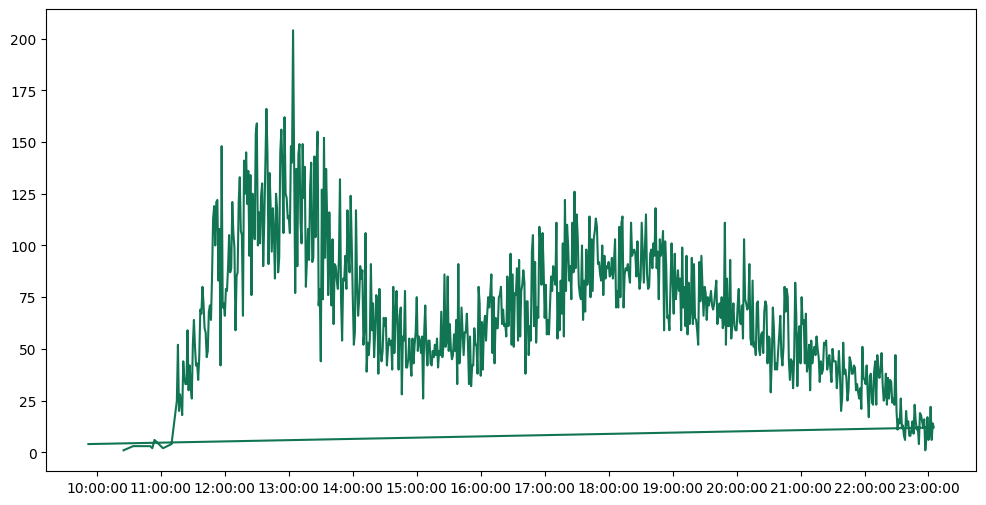

In [33]:
plt.figure(figsize=(12,6))
plt.plot(b3['order_time'].apply(lambda x: x.replace(year=2023, month=1, day=1)),b3['quantity'],linestyle='-', color='#117554')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

In [31]:
b3['order_time']

0     2023-01-01 10:25:00
1     2023-01-01 10:34:00
2     2023-01-01 10:43:00
3     2023-01-01 10:50:00
4     2023-01-01 10:52:00
              ...        
715   2023-01-01 23:02:00
716   2023-01-01 23:03:00
717   2023-01-01 23:04:00
718   2023-01-01 23:05:00
719   2023-01-01 09:52:00
Name: order_time, Length: 720, dtype: datetime64[ns]

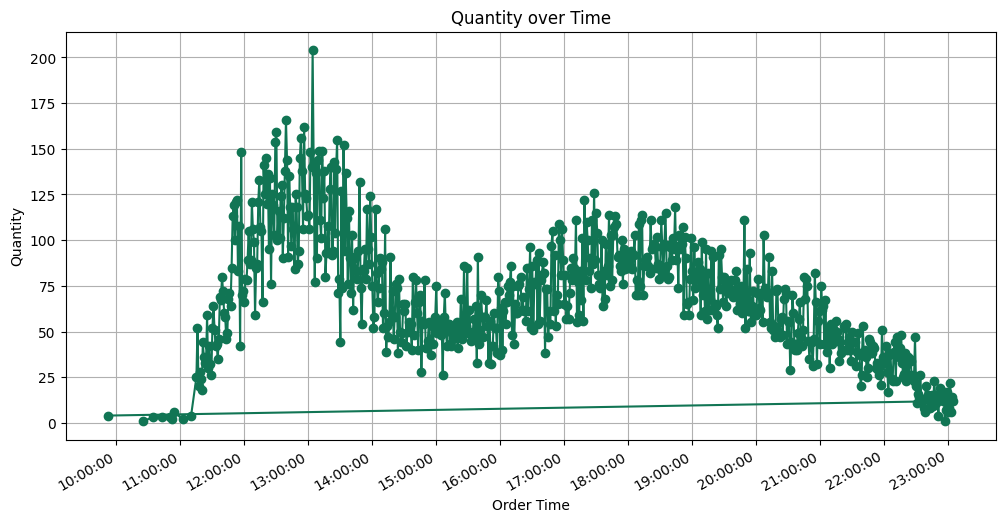

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Assuming b3 is your DataFrame

# Convert 'order_time' to a full datetime with a dummy date (e.g., 2023-01-01)
b3['order_time'] = pd.to_datetime(b3['order_time'], format='%H:%M:%S').apply(lambda x: x.replace(year=2023, month=1, day=1))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data with correct time handling
plt.plot(b3['order_time'], b3['quantity'], marker='o', linestyle='-', color='#117554')

# Set the x-axis to show time correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Adjust interval as needed

# Add labels and title
plt.title('Quantity over Time')
plt.xlabel('Order Time')
plt.ylabel('Quantity')

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import matplotlib.dates as mdates
 

plt.figure(figsize=(12, 6))
plt.plot(b3['order_time'], b3['quantity'], marker='o', linestyle='-', color='#117554')
plt.title('Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.show()

In [41]:
b1

,orderdate3,quantity
30,2015-01-31,145


In [63]:
b2['quantity'].std()

np.float64(19.2407090307214)

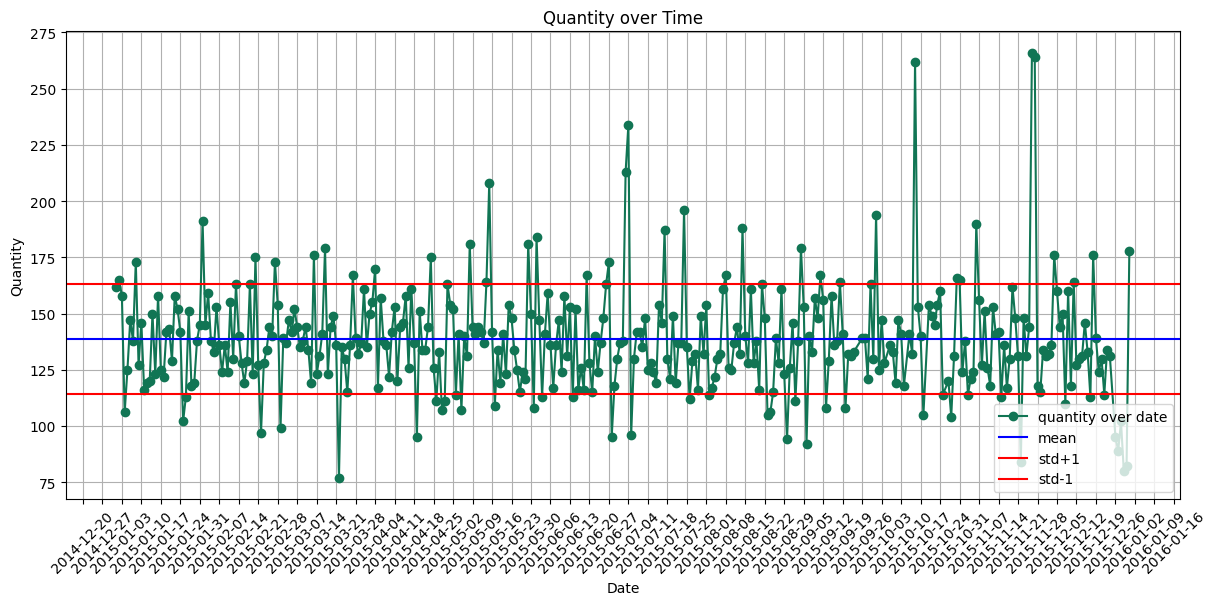

In [112]:
import matplotlib.dates as mdates
 
b2=b1.loc[:,:]

plt.figure(figsize=(12, 6))
plt.plot(b2['orderdate3'], b2['quantity'], marker='o', linestyle='-', color='#117554',label='quantity over date')
plt.title('Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.axhline(b2['quantity'].mean(),color='b',label='mean')
plt.axhline(b2['quantity'].mean()+b2['quantity'].std(),color='r',label='std+1')
plt.axhline(b2['quantity'].mean()-b2['quantity'].std(),color='r',label='std-1')
plt.legend(loc='lower right')
plt.savefig('quantity over Time.png')
plt.show()

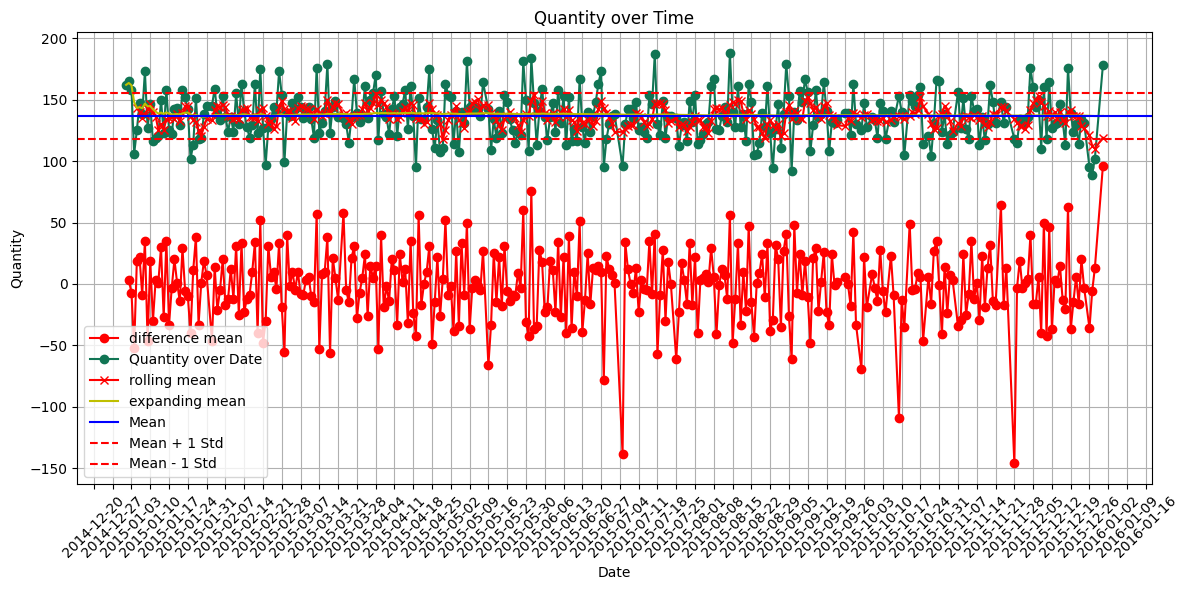

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Example DataFrame
# df = pd.read_csv('your_data.csv')  # Use your actual data source

# Assuming b2 is your DataFrame
b2 = b1.loc[:, :]

# Calculate quantiles and bounds
x = b2['quantity'].quantile(0.25)
y = b2['quantity'].quantile(0.75)
z = y - x
lowerbound = x - 1.5 * z
upperbound = y + 1.5 * z
b2['difference']=b2['quantity'].diff()
# Filter data based on bounds
b2 = b2[(b2['quantity'] >= lowerbound) & (b2['quantity'] <= upperbound)]
b2['rolling mean']=b2['quantity'].rolling(window=5).mean()
b2['expanding']=b2['quantity'].expanding().mean()


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(b2['orderdate3'],b2['difference'],color='r',marker='o',label='difference mean')
plt.plot(b2['orderdate3'], b2['quantity'], marker='o', linestyle='-', color='#117554', label='Quantity over Date')
plt.plot(b2['orderdate3'],b2['rolling mean'],label='rolling mean',marker='x',color='r')
plt.plot(b2['orderdate3'],b2['expanding'],label='expanding mean',color='y')
plt.title('Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)

# Formatting x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Adding mean and standard deviation lines
mean_quantity = b2['quantity'].mean()
std_quantity = b2['quantity'].std()
plt.axhline(mean_quantity, color='b', label='Mean')
plt.axhline(mean_quantity + std_quantity, color='r', linestyle='--', label='Mean + 1 Std')
plt.axhline(mean_quantity - std_quantity, color='r', linestyle='--', label='Mean - 1 Std')

# Adding legend and saving the plot
plt.legend()
plt.tight_layout()
plt.savefig('quantity_over_time.png')
plt.show()


e:\guvi project\Time series Analaysis\venv\Lib\site-packages\numpy\linalg\_linalg.py:2432: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1cab6ae93a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cab61d1ac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cab6b62870>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cab6b285f0>}

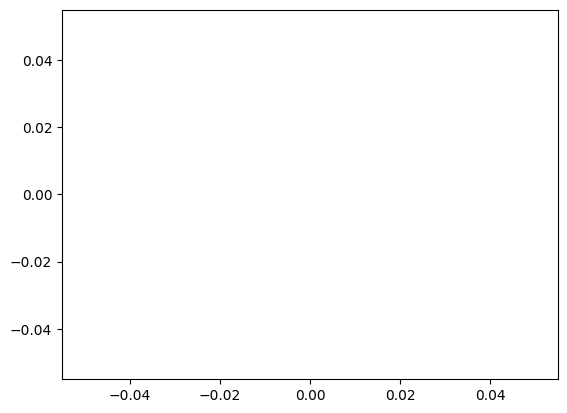

In [187]:
plt.violinplot(b2['rolling mean'])

In [192]:
b2['rolling mean'].dropna()

4      143.2
5      140.2
6      134.8
7      137.8
8      142.0
       ...  
351    126.6
352    120.8
353    112.6
354    110.2
357    119.0
Name: rolling mean, Length: 340, dtype: float64

In [169]:
b2['orderdate3'].iloc[-1]

Timestamp('2015-12-31 00:00:00')

e:\guvi project\Time series Analaysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\guvi project\Time series Analaysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\guvi project\Time series Analaysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\guvi project\Time series Analaysis\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\guvi project\Time series Analaysis\venv\Lib\site-packages\s

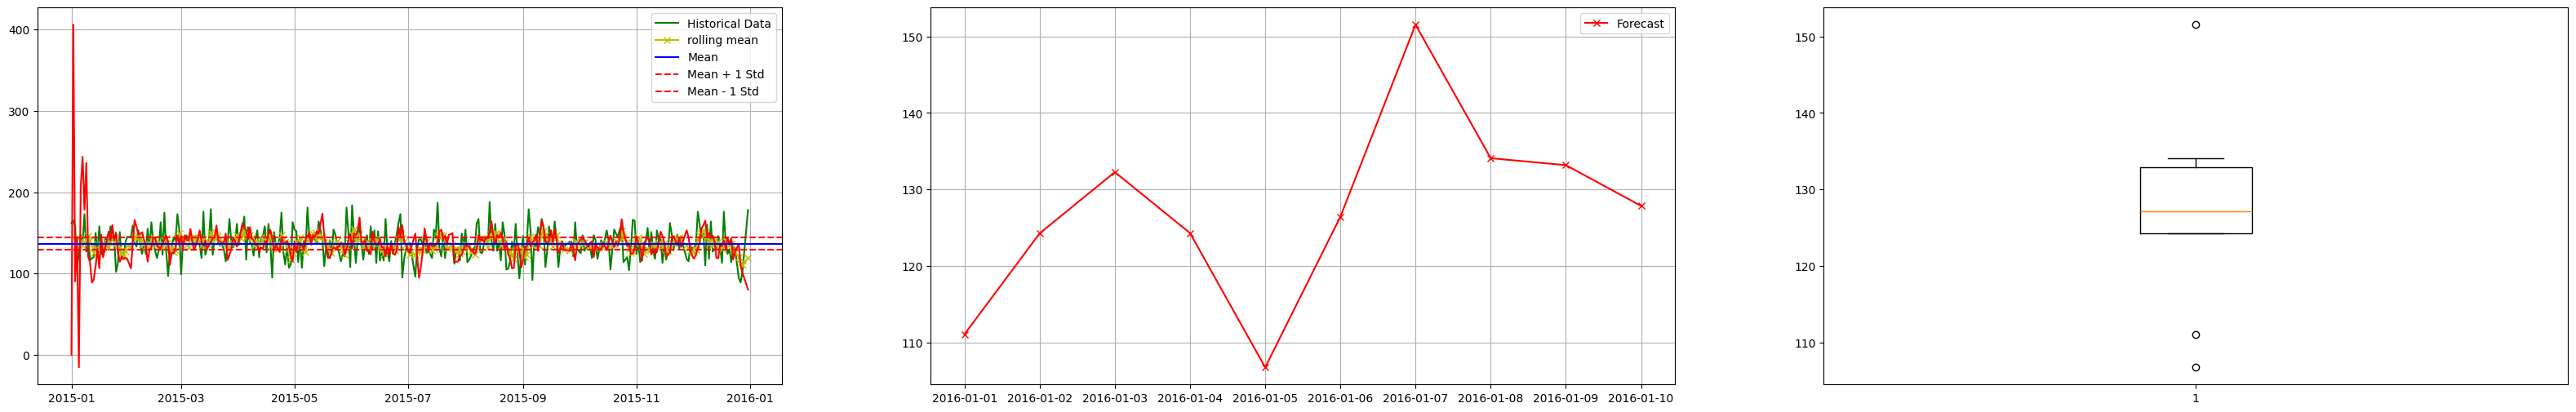

In [210]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(b2['quantity'], order=(10,4,4))  # You can adjust the (p,d,q) parameters
model_fit = model.fit()

# Forecast future points
forecast = model_fit.forecast(steps=10)  # Forecasting the next 10 steps

# Plot the historical data and forecast
# plt.figure(figsize=(24, 12))
fig,ax=plt.subplots(1,3,figsize=(40,6))

ax[0].plot(b2['orderdate3'], b2['quantity'], label='Historical Data',color='g')
ax[0].plot(b2['orderdate3'],b2['rolling mean'],label='rolling mean',marker='x',color='y')
ax[0].plot(b2['orderdate3'],model_fit.fittedvalues,color='r')
mean_quantity = b2['rolling mean'].mean()
std_quantity = b2['rolling mean'].std()
ax[0].axhline(mean_quantity, color='b', label='Mean')
ax[0].axhline(mean_quantity + std_quantity, color='r', linestyle='--', label='Mean + 1 Std')
ax[0].axhline(mean_quantity - std_quantity, color='r', linestyle='--', label='Mean - 1 Std')
ax[0].legend()
ax[0].grid(True)
# ax[0].set_legend()
ax[1].plot(pd.date_range(start=b2['orderdate3'].iloc[-1]+ pd.DateOffset(days=1), periods=10, freq='D'), forecast, label='Forecast',marker='x', color='red')
ax[1].legend()
ax[1].grid(True)
ax[2].boxplot(forecast)

# ax[1].set_legend()
# plt.xlabel('Date')
# plt.ylabel('Quantity')
# plt.title('Quantity Forecast')
# plt.xticks(rotation=90)
# plt.legend()
# plt.grid(True)
plt.savefig('timeseries.png')
plt.show()



from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a toy dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # OR np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 7, 12, 18])

# Create a linear regression model
model = LinearRegression()

# Train the model and record the loss at each epoch
loss = []
for i in range(100):
    # model.fit(np.log(X), y)
    X_new = np.array([[6]])
    # Train and Predict the output for a new input
    y_pred = model.fit(np.log(X), y).predict(np.log(X_new)) 
    # or First fit : model.fit(np.log(X), y), then Predict : y_pred = model.predict(np.log(X_new))

    mse = np.mean((y_pred - y)**2)
    loss.append(mse)

# Plot the loss as a function of the number of epochs
plt.plot(range(len(loss)), loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

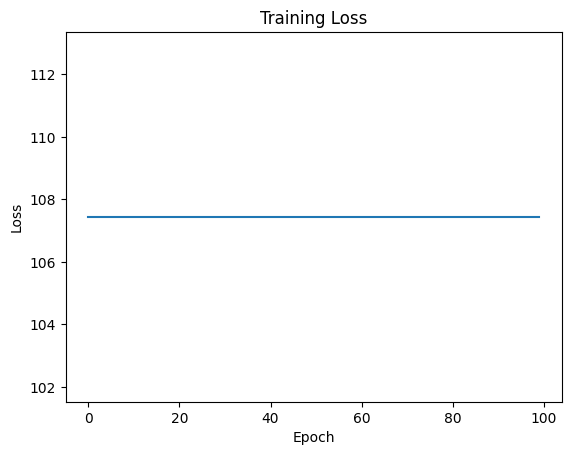

In [212]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a toy dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # OR np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 7, 12, 18])

# Create a linear regression model
model = LinearRegression()

# Train the model and record the loss at each epoch
loss = []
for i in range(100):
    # model.fit(np.log(X), y)
    X_new = np.array([[6]])
    # Train and Predict the output for a new input
    y_pred = model.fit(np.log(X), y).predict(np.log(X_new)) 
    # or First fit : model.fit(np.log(X), y), then Predict : y_pred = model.predict(np.log(X_new))

    mse = np.mean((y_pred - y)**2)
    loss.append(mse)

# Plot the loss as a function of the number of epochs
plt.plot(range(len(loss)), loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [213]:
loss

[np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.float64(107.439170953015),
 np.floa

In [163]:
forecast

344    127.362516
345    120.923749
346    117.309958
347    120.691725
348    119.936768
349    136.736401
350    125.642987
351    123.166332
352    123.037971
353    124.952060
Name: predicted_mean, dtype: float64

In [168]:
pd.date_range(start=b2['orderdate3'].iloc[-1], periods=10, freq='D')

DatetimeIndex(['2015-12-31', '2016-01-01', '2016-01-02', '2016-01-03',
               '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-09'],
              dtype='datetime64[ns]', freq='D')

mean1:-0.0862275449101795,mean2:-0.05697674418604658
var1:33.725050140682484,var2:29.577319461444315


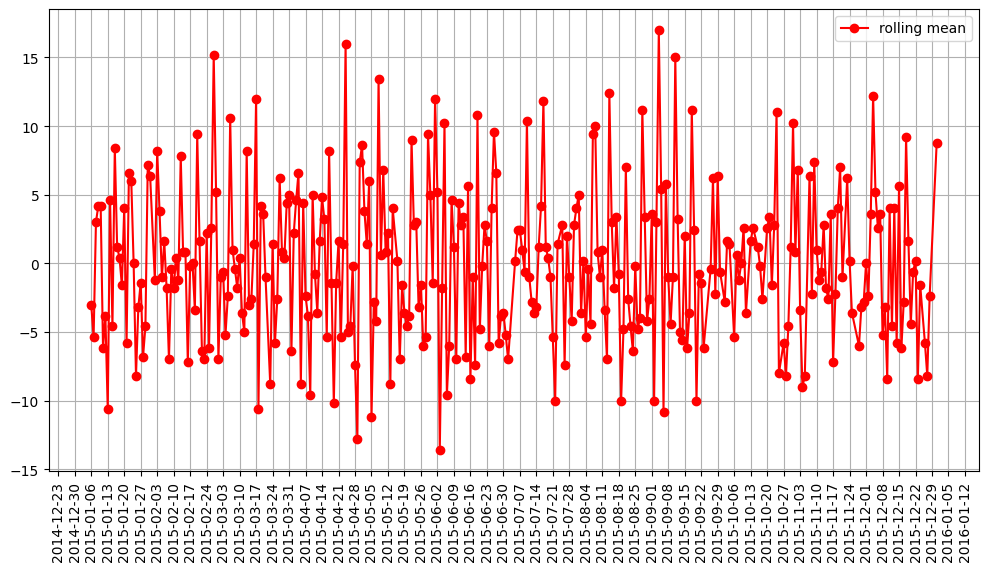

In [151]:

#b2['rolling mean']=b2['quantity'].rolling(window=5).mean()
b2['difference']=b2['quantity'].diff()
split=round(len(b2['rolling mean'])/2)
x1,x2=b2['rolling mean'][0:split],b2['rolling mean'][split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print(f'mean1:{mean1},mean2:{mean2}')
print(f'var1:{var1},var2:{var2}')
plt.figure(figsize=(12,6))
plt.plot(b2['orderdate3'],b2['rolling mean'],color='r',marker='o',label='rolling mean')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

In [104]:
b2['rolling mean']=b2['quantity'].rolling(window=5).mean()

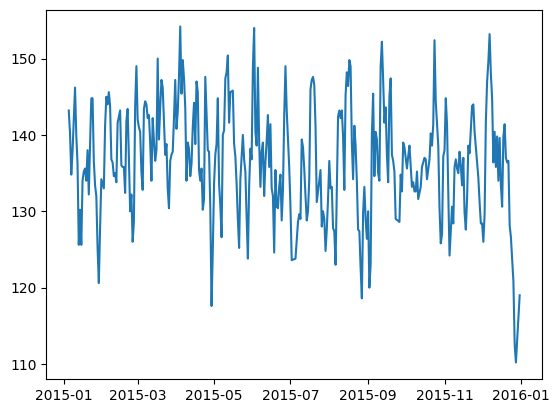

In [106]:
plt.plot(b2['orderdate3'],b2['rolling mean'])

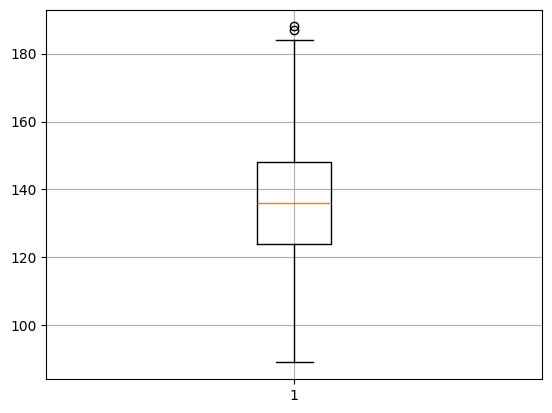

In [93]:
plt.boxplot(b2["quantity"])
plt.grid(True)

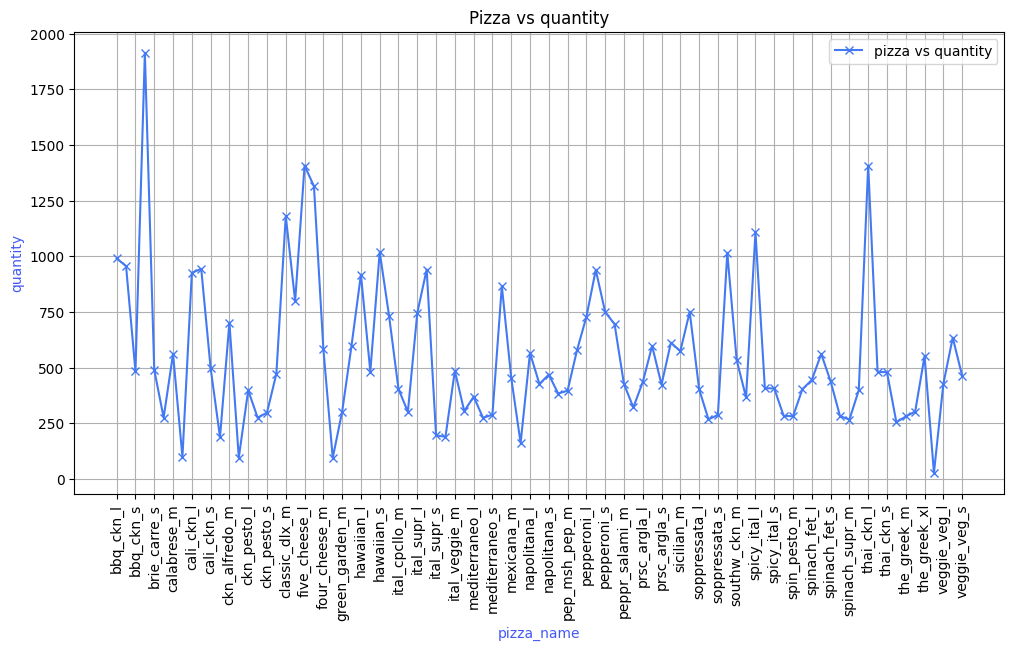

In [25]:
x_positions = range(len(b2['pizza_name_id']))
#plt.style.use('grayscale')
plt.figure(figsize=(12,6)) 
plt.plot(b2['pizza_name_id'],b2['quantity'],marker='x',linestyle='-',color='#4379F2',label='pizza vs quantity')
plt.xticks(ticks=x_positions[::2], labels=b2['pizza_name_id'][::2],rotation=90)
plt.xlabel('pizza_name',color='#4359F2')
plt.ylabel('quantity',color='#4359F2')
plt.title('Pizza vs quantity')
plt.legend()
plt.grid(True)



In [317]:
b1

,orderdate3,quantity
0,2015-01-01,162
1,2015-01-02,165
2,2015-01-03,158
3,2015-01-04,106
4,2015-01-05,125
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


(array([16436., 16467., 16495., 16526., 16556., 16587., 16617., 16648.,
        16679., 16709., 16740., 16770., 16801.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16556.0, 0, '2015-05-01'),
  Text(16587.0, 0, '2015-06-01'),
  Text(16617.0, 0, '2015-07-01'),
  Text(16648.0, 0, '2015-08-01'),
  Text(16679.0, 0, '2015-09-01'),
  Text(16709.0, 0, '2015-10-01'),
  Text(16740.0, 0, '2015-11-01'),
  Text(16770.0, 0, '2015-12-01'),
  Text(16801.0, 0, '2016-01-01')])

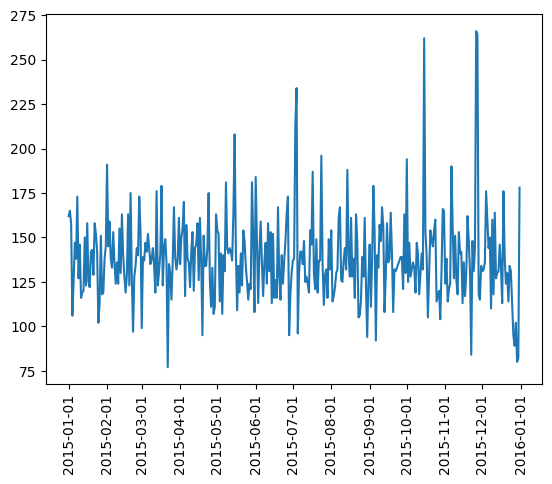

In [327]:
plt.plot(b1['orderdate3'],b1['quantity'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)

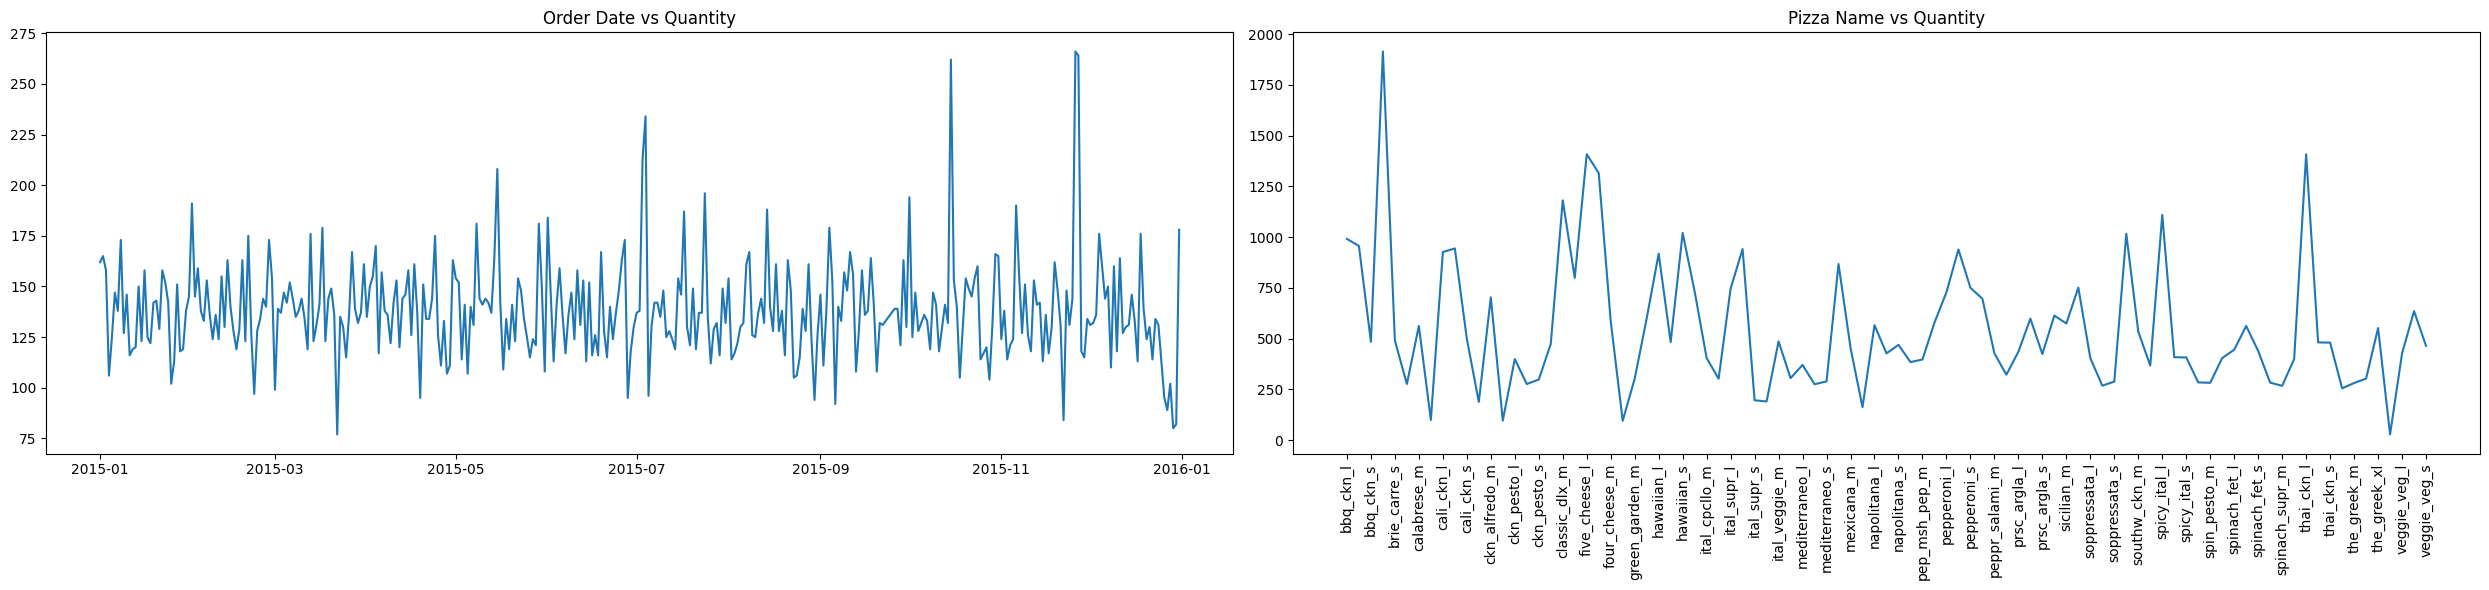

In [290]:
import matplotlib.pyplot as plt
order_date = b1['order_date'] 
quantity = b1['quantity']
tick_positions = range(0, len(order_date), 10)
fig,ax=plt.subplots(1,2,figsize=(25,6)) 
ax[0].plot(b1['orderdate3'],b1['quantity'])

#ax[0].set_xticks(tick_positions)
#ax[0].set_xticklabels([order_date[i] for i in tick_positions], rotation=90)
ax[0].set_title('Order Date vs Quantity')
ax[1].plot(b2['pizza_name_id'],b2['quantity'])
ax[1].set_xticks(range(0, len(b2['pizza_name_id']), 2)) 
ax[1].set_xticklabels(b2['pizza_name_id'][::2], rotation=90)
ax[1].set_title('Pizza Name vs Quantity')

plt.tight_layout()

In [ ]:
plt.plot(b2['pizza_name_id'],b2['quantity'])

In [33]:
result_outer = pd.merge(a, b, on='pizza_ingredients', how='outer')

In [24]:
a1=a.set_index('pizza_ingredients')
b1=b.set_index('pizza_ingredients')


In [26]:
result_outer1 = a1.join(b1, how='outer', lsuffix='_a1', rsuffix='_b1')


In [34]:
result_outer

,pizza_name_id_x,pizza_name_x,pizza_ingredients,Items_Qty_In_Grams,pizza_id,order_id,pizza_name_id_y,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_name_y
0,calabrese_l,The Calabrese Pizza,?duja Salami,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,calabrese_m,The Calabrese Pizza,?duja Salami,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,calabrese_s,The Calabrese Pizza,?duja Salami,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",NaN,44.0,17.0,calabrese_m,1.0,1/1/2015,13:53:00,16.25,16.25,M,Supreme,The Calabrese Pizza
4,NaN,NaN,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",NaN,471.0,201.0,calabrese_m,1.0,3/1/2015,22:29:59,16.25,16.25,M,Supreme,The Calabrese Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49133,NaN,NaN,NaN,NaN,632.0,278.0,ital_veggie_m,1.0,5/1/2015,15:49:21,16.75,16.75,M,Veggie,The Italian Vegetables Pizza
49134,NaN,NaN,NaN,NaN,633.0,278.0,southw_ckn_l,1.0,5/1/2015,15:49:21,20.75,20.75,L,Chicken,The Southwest Chicken Pizza
49135,NaN,NaN,NaN,NaN,634.0,279.0,cali_ckn_m,1.0,5/1/2015,16:07:03,16.75,16.75,M,Chicken,The California Chicken Pizza
49136,NaN,NaN,NaN,NaN,635.0,279.0,ckn_alfredo_m,1.0,5/1/2015,16:07:03,16.75,16.75,M,Chicken,The Chicken Alfredo Pizza


In [3]:
a

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


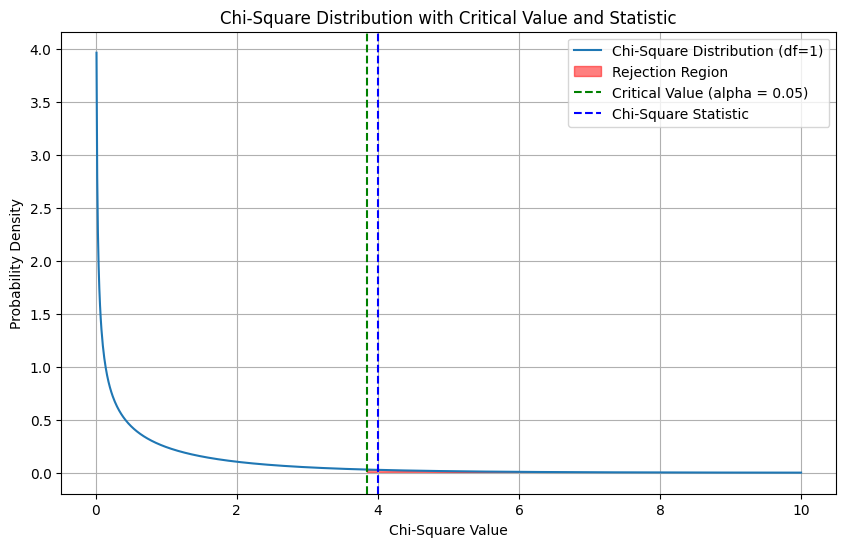

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters for the chi-square distribution
df = 1  # degrees of freedom
alpha = 0.05  # significance level
chi2_stat = 4.00  # calculated chi-square statistic

# Generate a range of x values
x = np.linspace(0, 10, 1000)
# Compute the chi-square distribution values
y = chi2.pdf(x, df)

# Compute the critical value
critical_value = chi2.ppf(1 - alpha, df)

# Plot the chi-square distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-Square Distribution (df={df})')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Rejection Region')

# Add vertical lines for critical value and calculated statistic
plt.axvline(critical_value, color='green', linestyle='--', label='Critical Value (alpha = 0.05)')
plt.axvline(chi2_stat, color='blue', linestyle='--', label='Chi-Square Statistic')

# Add labels and legend
plt.title('Chi-Square Distribution with Critical Value and Statistic')
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()